In [1]:
import pandas as pd

In [2]:
dfw_2011 = pd.read_csv("dfw_2011.csv")

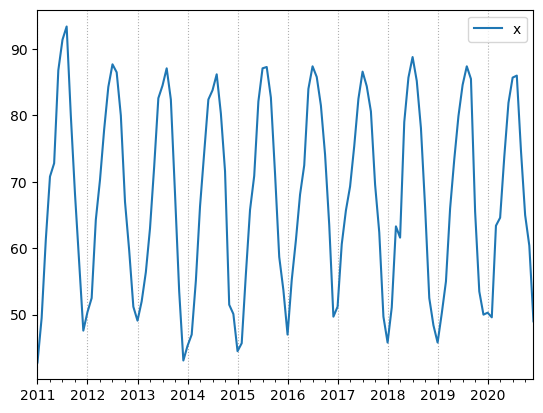

In [3]:
dti = pd.date_range("2011", "2021", freq="M")
dfw_2011.index = dti
ax = dfw_2011.plot()
ax.xaxis.grid(True,linestyle="dotted")

In [4]:
# type(dfw_2011.index)
dfw_2011.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2011-01-31 to 2020-12-31
Freq: M
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [5]:
bitcoin = pd.read_csv("bitcoin.csv", parse_dates=['Date'], index_col="Date")

In [15]:
# type(bitcoin.index)
bitcoin.index.name = None
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461 entries, 2020-01-01 to 2021-04-05
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  457 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [14]:
s = bitcoin.squeeze()
s.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 461 entries, 2020-01-01 to 2021-04-05
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
457 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


In [ ]:
s